# Simulación de un Sistema de Comunicaciones FM en Python

## Explicación del Código

### 1. Configuración inicial
```python
# Parámetros del sistema
fs = 100000  # Frecuencia de muestreo (Hz)
T = 0.02     # Duración de la simulación (segundos)
t = np.arange(0, T, 1/fs)  # Vector de tiempo

# Parámetros de la señal modulante (mensaje)
fm = 1000    # Frecuencia de la señal modulante (Hz)
Am = 1       # Amplitud de la señal modulante

# Parámetros de la portadora
fc = 10000   # Frecuencia de la portadora (Hz)
Ac = 1       # Amplitud de la portadora

# Índice de modulación (beta)
beta = 5

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy.special import jn  # Funciones de Bessel

# Parámetros del sistema
fs = 100000  # Frecuencia de muestreo (Hz)
T = 0.02     # Duración de la simulación (segundos)
t = np.arange(0, T, 1/fs)  # Vector de tiempo

# Parámetros de la señal modulante (mensaje)
fm = 1000    # Frecuencia de la señal modulante (Hz)
Am = 1       # Amplitud de la señal modulante

# Parámetros de la portadora
fc = 10000   # Frecuencia de la portadora (Hz)
Ac = 1       # Amplitud de la portadora

# Índice de modulación (beta)
beta = 5

# 1. Generar señal modulante (mensaje)
$$ m_t = Am * np.sin(2 * np.pi * fm * t) $$

# 2. Generar señal FM
m_t_integral = np.cumsum(m_t) * (1/fs)
fm_t = Ac * np.cos(2 * np.pi * fc * t + 2 * np.pi * beta * m_t_integral)

In [15]:
# 1. Generar señal modulante (mensaje)
m_t = Am * np.sin(2 * np.pi * fm * t)

# 2. Generar señal FM
# Primero calculamos la integral de la señal modulante
m_t_integral = np.cumsum(m_t) * (1/fs)
# Señal FM
fm_t = Ac * np.cos(2 * np.pi * fc * t + 2 * np.pi * beta * m_t_integral)

# 3. Análisis espectral
N = len(fm_t)  # Número de muestras
f = np.linspace(-fs/2, fs/2, N)  # Vector de frecuencias

# Calcular FFT
fm_f = fftshift(fft(fm_t)) / N
P_espectral = np.abs(fm_f)**2  # Densidad espectral de potencia

n_max = int(np.ceil(beta + 6))  # Número máximo de bandas laterales
bandas = fc + np.arange(-n_max, n_max+1) * fm

# Calcular potencias teóricas usando funciones de Bessel
P_teorica = np.array([(Ac**2/2) * (jn(n, beta)**2) for n in range(-n_max, n_max+1)])
P_total_teorica = np.sum(P_teorica)

# Bandas con más del 1% de potencia total
umbral = 0.01 * P_total_teorica
bandas_significativas = bandas[np.where(P_teorica > umbral)]
P_significativas = P_teorica[np.where(P_teorica > umbral)]

In [16]:
# 4. Calcular bandas laterales con funciones de Bessel
# Frecuencias de las bandas laterales
n_max = int(np.ceil(beta + 6))  # Número máximo de bandas laterales a considerar
bandas = fc + np.arange(-n_max, n_max+1) * fm

# Calcular potencias teóricas usando funciones de Bessel
P_teorica = np.array([(Ac**2/2) * (jn(n, beta)**2) for n in range(-n_max, n_max+1)])
P_total_teorica = np.sum(P_teorica)

# Encontrar bandas laterales con más del 1% de la potencia total
umbral = 0.01 * P_total_teorica
bandas_significativas = bandas[np.where(P_teorica > umbral)]
P_significativas = P_teorica[np.where(P_teorica > umbral)]

plt.figure(figsize=(15, 10))

# Gráfico 1: Señal FM en dominio temporal
plt.subplot(3, 1, 1)
# [configuración del gráfico...]

# Gráfico 2: Espectro de frecuencia
plt.subplot(3, 1, 2)
# [configuración del gráfico...]

# Gráfico 3: Distribución teórica de potencia
plt.subplot(3, 1, 3)
# [configuración del gráfico...]

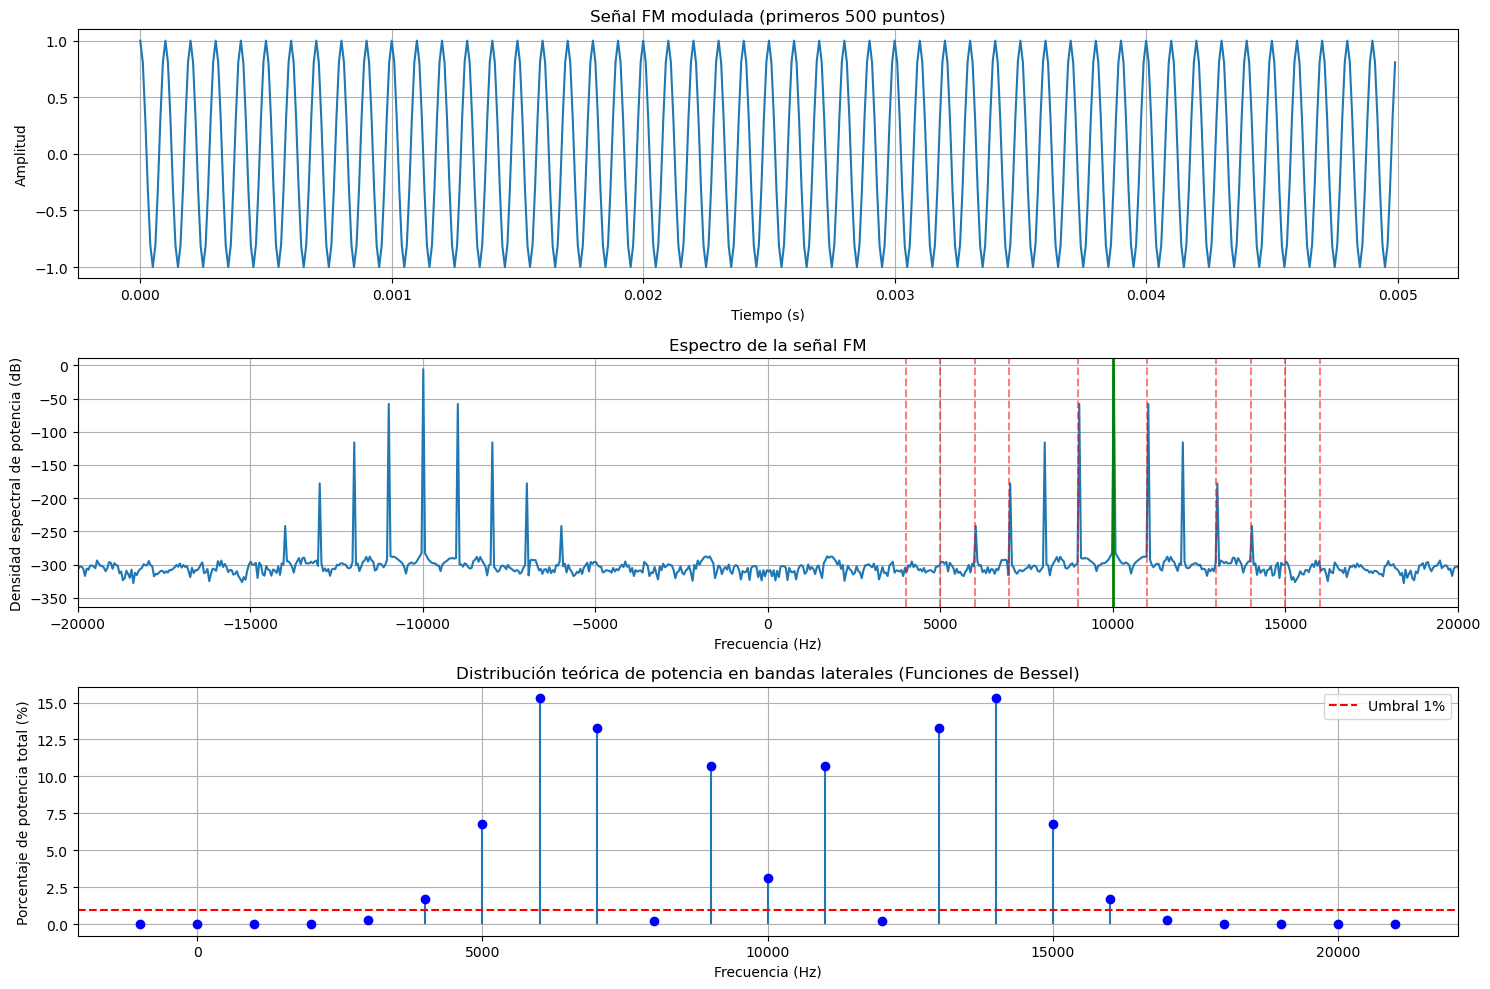

In [17]:
# 5. Visualización
plt.figure(figsize=(15, 10))

# Señal modulada en el tiempo
plt.subplot(3, 1, 1)
plt.plot(t[:500], fm_t[:500])  # Mostramos solo los primeros 500 puntos para claridad
plt.title('Señal FM modulada (primeros 500 puntos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

# Espectro de la señal FM
plt.subplot(3, 1, 2)
plt.plot(f, 10*np.log10(P_espectral))  # Espectro en dB
plt.xlim([-20000, 20000])  # Zoom alrededor de la portadora
plt.title('Espectro de la señal FM')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (dB)')
plt.grid()

# Marcas las bandas laterales significativas
for freq, power in zip(bandas_significativas, P_significativas):
    if freq != fc:
        plt.axvline(x=freq, color='r', linestyle='--', alpha=0.5)
    else:
        plt.axvline(x=freq, color='g', linestyle='-', linewidth=2)

# Gráfico de las bandas laterales teóricas
plt.subplot(3, 1, 3)
plt.stem(bandas, P_teorica/P_total_teorica*100, markerfmt='bo', basefmt=" ")
plt.axhline(y=1, color='r', linestyle='--', label='Umbral 1%')
plt.title('Distribución teórica de potencia en bandas laterales (Funciones de Bessel)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Porcentaje de potencia total (%)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print("\nBandas laterales con más del 1% de la potencia total:")
# [impresión de resultados...]

In [18]:
# Mostrar información sobre las bandas laterales significativas
print("\nBandas laterales con más del 1% de la potencia total:")
print("Frecuencia (Hz) | Potencia (% del total)")
for freq, power in zip(bandas_significativas, P_significativas):
    print(f"{freq:12.1f}   | {power/P_total_teorica*100:10.2f}")


Bandas laterales con más del 1% de la potencia total:
Frecuencia (Hz) | Potencia (% del total)
      4000.0   |       1.72
      5000.0   |       6.82
      6000.0   |      15.31
      7000.0   |      13.31
      9000.0   |      10.73
     10000.0   |       3.15
     11000.0   |      10.73
     13000.0   |      13.31
     14000.0   |      15.31
     15000.0   |       6.82
     16000.0   |       1.72
